# Pytorch Neural Network layers

 The developers of the framework have already included a wide range of classes that pre-define a lot of the building blocks of Deep Learning. We therefore rarely have to define loss functions from first principles (using exp, log and suchlike). Instead we can rely on ready made building blocks that can be efficiently connected to one and other. And once again, Pytorch will automatically compute gradients for us.

For Logistic Regression the only ingredient we need is a Linear layer, that plays the role of the W matrix we had before. The loss function can be defined using the CrossEntropyLoss class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import torch
iris = datasets.load_iris()

X = torch.tensor(iris.data,dtype=torch.float32)
T = torch.tensor(iris.target,dtype=torch.long)

C= len(set(list(T)))
F = X.shape[1]

In [2]:
#For Logistic Regression the only ingredient we need is a Linear layer, that plays the role of the  W  matrix we had before. The loss function can be defined using the CrossEntropyLoss class.
W = torch.nn.Linear(F,C)
loss = torch.nn.CrossEntropyLoss(reduction='sum')

All `Pytorch` layers (including loss functions) can be used as functions on tensors, producing other tensors as results. So the function call 
W(X) maps each of the 4D row vector elements of tensor `X` to a 3D output vector by multiplying by a weight matrix and addind a bias $b$ to the result. The loss function takes the output of `W` and the correct labels `T` and computes the total negative log likelihood

In [3]:
L = loss(W(X),T)

In [4]:
#all in a single line of code! Now we can execute backward() function as before.
L.backward()

Yet another convenience that Pytorch provides is the simplification of the gradient descent code. After all, there should be an easy way to abstract away what is always going to be the same line of code, i.e. taking the model parameter and subtracting its gradient (to be found in .grad) times the learning rate. And indeed that's what Pytorch offers. All we need to define is an optimizer object (in our case implementing Stochastic Gradient Descent, but there are many other variants) give it pointers to the parameters that should be optimized as well as a learning rate. All this is accomplished by

In [5]:
optim = torch.optim.SGD(W.parameters(),lr=5e-4)


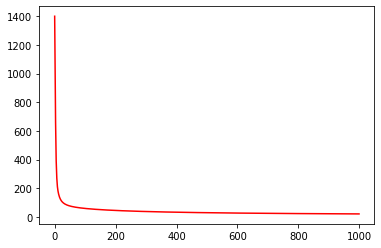

In [6]:
#Putting everything together gives us
X = torch.tensor(iris.data,dtype=torch.float32)
T = torch.tensor(iris.target,dtype=torch.long)

W = torch.nn.Linear(F,C)
loss = torch.nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(W.parameters(), lr=5e-4)

Ls=[]
for e in range(1000):
  optim.zero_grad()
  L = loss(W(X),T)
  L.backward()
  optim.step()
  Ls.append(L.item())
plt.plot(Ls,'r-')

To compute the accuracy of the predictions all we need is to use the .topk method that returns the values and indices of the top  K  elements along a particular dimension in a tensor.

In [7]:
from torch._C import dtype
_,T_Pred = W(X).topk(1)
acc = (T_Pred.flatten()==T).sum(dtype=torch.float)/ len(T)
print(f'accuracy={acc}')

accuracy=0.9800000190734863
